<a href="https://colab.research.google.com/github/DashedMango13/MNIST-Handwritten-Digit-Recognition-Using-CNNs/blob/main/Convolutional_Neural_Network_Handwritten_Digit_Recoognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from posix import chdir
import os
chdir('/content/drive/MyDrive/IMGS-362')
os.getcwd()

'/content/drive/MyDrive/IMGS-362'

In [ ]:
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential, Model

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


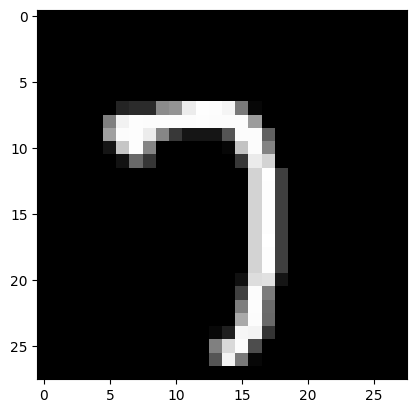

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[2700], cmap="gray")

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [ ]:
batch_size = 200
num_classes = 10
epochs = 5
input_shape = (28, 28, 1)
model = Sequential([
    tf.keras.Input(shape=input_shape),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(64, 3, activation = 'relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split = 0.1)

Epoch 1/5
125/270 [============>.................] - ETA: 1:27 - loss: 0.3873 - accuracy: 0.8822

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_test,y_test, verbose=2)
print('test loss', score[0])
print('test accuracy', score[1])

313/313 - 15s - loss: 0.0291 - accuracy: 0.9911 - 15s/epoch - 49ms/step
test loss 0.029131775721907616
test accuracy 0.991100013256073


In [ ]:
model.save("MNIST Handwritten Digits.h5")

In [ ]:
from keras.models import load_model
model = load_model("MNIST Handwritten Digits.h5")

In [ ]:
from tensorflow.keras.preprocessing import image
import os
import shutil
image_path = "./CNNDigits/assets"

checkpoints_dir = os.path.join(image_path, '.ipynb_checkpoints')
if os.path.exists(checkpoints_dir) and os.path.isdir(checkpoints_dir):
    # Delete the .ipynb_checkpoints directory
    shutil.rmtree(checkpoints_dir)

im=[]
valid_extensions = ['.jpg', '.jpeg', '.png']

for img in os.listdir(image_path):
  img = os.path.join(image_path, img)
  img = image.load_img(img, color_mode="grayscale", target_size=(28,28))
  img = image.img_to_array(img)
  img = img.reshape(1,28,28,1)
  img=img.astype('float32')
  img = img /255.0
  im.append(img)
im = np.vstack(im)

In [ ]:
#prediction = model1.predict(np.array([x_test[73]]))
filenames=[]
for filename in os.listdir(image_path):
  classes = model.predict(im, batch_size=10)
  filenames.append(filename)
print(filenames)
print(np.argmax(classes, 1))

1/1 [==============================] - 0s 27ms/step
['8.jpg', '3.jpg', '5.jpg', '1.jpg', '2.jpg', '0.jpg', '4.jpg', '7.jpg', '6.jpg', '9.jpg']
[8 3 5 1 2 0 4 7 6 9]
